Importing all the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import json
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.serialize import model_to_json, model_from_json

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('train 2.csv')
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [7]:
data.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

We observe that date column is in object format we will convert it to datetimestamp

In [8]:
data.date = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [10]:
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


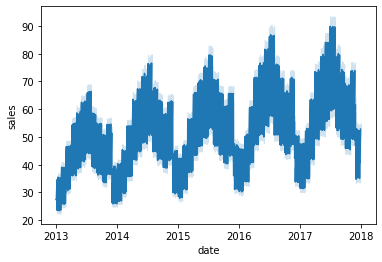

In [11]:
sns.lineplot(x='date',y='sales', data=data)
plt.show()

We can observe that all the 50 items is shwing similiar trends. They are rising in mid of year and dropping at the end of year.

Now we will tale item 1 from the main data frame.

In [12]:
data_item_1 = data[data['item'] == 1]
data_item_1.tail()

,date,store,item,sales
18255,2017-12-27,10,1,19
18256,2017-12-28,10,1,12
18257,2017-12-29,10,1,23
18258,2017-12-30,10,1,26
18259,2017-12-31,10,1,27


In [13]:
# plt.figure(figsize=(25,20))
# sns.lineplot(x='date',y='sales', data=data_item_1)
# plt.show()

In [14]:
# plt.figure(figsize=(15,20))
# sns.lineplot(data=data_item_1, x='date', y='sales', hue = 'date',legend='full')
# plt.title('Seasonal Plot')
# plt.show()

In [15]:
# plt.figure(figsize=(80,40))
# sns.lineplot(data=data_item_1, x='date', y='sales', hue = 'store',legend='full')
# plt.title('Seasonal Plot')
# plt.show()

1. Above two figure describes about the trends in sales in all stores, from this we can say that the demands started picking up slowly from starting of year and reaches it peak at mid of year and from then on demands start droppings there on and reaches at its low at year end.
2. This figure also tolds that the sales are increasing year on year from 2013 to 2017.

In [16]:
data_item_1.describe()

,store,item,sales
count,18260.00000,18260.0,18260.000000
mean,5.50000,1.0,21.981599
std,2.87236,0.0,8.468922
min,1.00000,1.0,1.000000
25%,3.00000,1.0,16.000000
50%,5.50000,1.0,21.000000
75%,8.00000,1.0,27.000000
max,10.00000,1.0,59.000000


In [17]:
data_item_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18260 entries, 0 to 18259
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18260 non-null  datetime64[ns]
 1   store   18260 non-null  int64         
 2   item    18260 non-null  int64         
 3   sales   18260 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 713.3 KB


In [18]:
data_item_1

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
18255,2017-12-27,10,1,19
18256,2017-12-28,10,1,12
18257,2017-12-29,10,1,23
18258,2017-12-30,10,1,26


Now we will perform the dimensionality reduction and will remove the store and item from the data_item_1 so we can clearly visualize the relation between date and sales.

In [19]:
item_1 = data_item_1.drop(['store','item'], axis=1)
item_1.tail()

,date,sales
18255,2017-12-27,19
18256,2017-12-28,12
18257,2017-12-29,23
18258,2017-12-30,26
18259,2017-12-31,27


Here we will set date column as an index

In [20]:
item_1_sales = item_1.set_index('date')
item_1_sales.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=18260, freq=None)

Now we will take monthly mean of sales in every month.

In [21]:
y = item_1_sales['sales'].resample('MS').mean()

In [22]:
print(y)

date
2013-01-01    12.238710
2013-02-01    13.796429
2013-03-01    16.741935
2013-04-01    19.276667
2013-05-01    20.316129
2013-06-01    22.463333
2013-07-01    22.925806
2013-08-01    20.941935
2013-09-01    18.976667
2013-10-01    17.732258
2013-11-01    19.860000
2013-12-01    13.900000
2014-01-01    13.945161
2014-02-01    15.682143
2014-03-01    18.903226
2014-04-01    21.840000
2014-05-01    23.774194
2014-06-01    26.293333
2014-07-01    26.870968
2014-08-01    23.874194
2014-09-01    21.996667
2014-10-01    20.680645
2014-11-01    22.473333
2014-12-01    15.838710
2015-01-01    14.922581
2015-02-01    16.546429
2015-03-01    19.745161
2015-04-01    23.533333
2015-05-01    25.025806
2015-06-01    26.640000
2015-07-01    28.509677
2015-08-01    25.064516
2015-09-01    23.370000
2015-10-01    21.432258
2015-11-01    23.673333
2015-12-01    15.974194
2016-01-01    16.154839
2016-02-01    17.793103
2016-03-01    21.367742
2016-04-01    25.656667
2016-05-01    26.580645
2016-06-01 

In [23]:
y['2013':]

date
2013-01-01    12.238710
2013-02-01    13.796429
2013-03-01    16.741935
2013-04-01    19.276667
2013-05-01    20.316129
2013-06-01    22.463333
2013-07-01    22.925806
2013-08-01    20.941935
2013-09-01    18.976667
2013-10-01    17.732258
2013-11-01    19.860000
2013-12-01    13.900000
2014-01-01    13.945161
2014-02-01    15.682143
2014-03-01    18.903226
2014-04-01    21.840000
2014-05-01    23.774194
2014-06-01    26.293333
2014-07-01    26.870968
2014-08-01    23.874194
2014-09-01    21.996667
2014-10-01    20.680645
2014-11-01    22.473333
2014-12-01    15.838710
2015-01-01    14.922581
2015-02-01    16.546429
2015-03-01    19.745161
2015-04-01    23.533333
2015-05-01    25.025806
2015-06-01    26.640000
2015-07-01    28.509677
2015-08-01    25.064516
2015-09-01    23.370000
2015-10-01    21.432258
2015-11-01    23.673333
2015-12-01    15.974194
2016-01-01    16.154839
2016-02-01    17.793103
2016-03-01    21.367742
2016-04-01    25.656667
2016-05-01    26.580645
2016-06-01 

Now we will visualize the item sales monthly

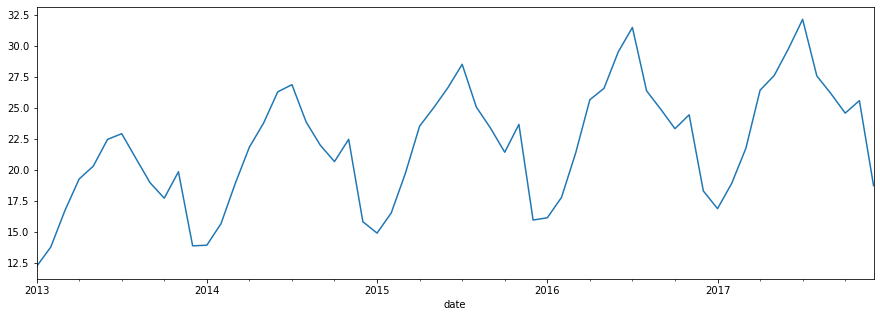

In [25]:
y.plot(figsize=(15,5))
plt.show()

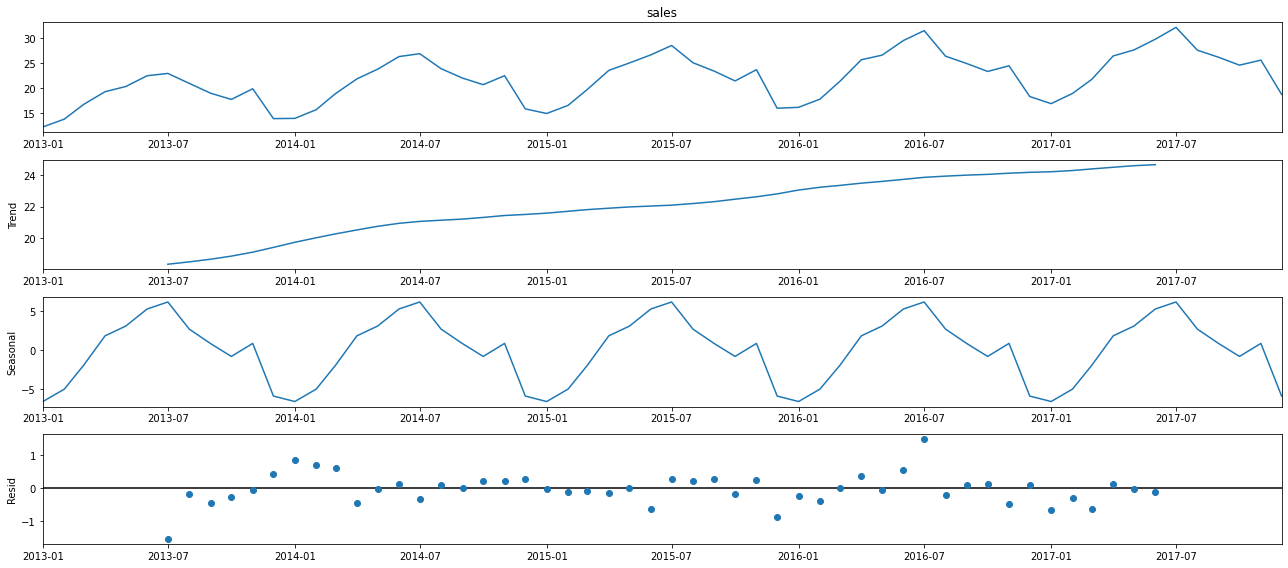

In [26]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The above plots clearly shows that following sales of item is seasonal and has an inreasing trend year on year. Every in summer the demand for following item is at peak and as we move forward to year end demands start getting reduce has slight increase in demans around september and october and reach its lowest point in december and from then on it shows increasing trend. This trends is same for every year.

### We will use ARIMA model for forcasting

In [27]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

print('p,d,q combination of ARIMA model')
print('ARIMAmax: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAmax: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAmax: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('ARIMAmax: {} x {}'.format(pdq[2], seasonal_pdq[2]))

p,d,q combination of ARIMA model
ARIMAmax: (0, 0, 1) x (0, 0, 1, 12)
ARIMAmax: (0, 0, 1) x (0, 0, 1, 12)
ARIMAmax: (0, 1, 0) x (0, 1, 0, 12)
ARIMAmax: (0, 1, 0) x (0, 1, 0, 12)


### Now we will find the optimal parameter of ARIMA model

In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y, order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            results = mod.fit(maxiter=200, method='nm')
            print('ARIMA Parameters: {} x {}'.format(param,param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 4.460986
         Iterations: 15
         Function evaluations: 30
ARIMA Parameters: (0, 0, 0) x (0, 0, 0, 12)
Optimization terminated successfully.
         Current function value: 3.273019
         Iterations: 112
         Function evaluations: 211
ARIMA Parameters: (0, 0, 0) x (0, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 1.597344
         Iterations: 12
         Function evaluations: 24
ARIMA Parameters: (0, 0, 0) x (0, 1, 0, 12)
Optimization terminated successfully.
         Current function value: 1.019459
         Iterations: 163
         Function evaluations: 356
ARIMA Parameters: (0, 0, 0) x (0, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 1.145499
         Iterations: 24
         Function evaluations: 48
ARIMA Parameters: (0, 0, 0) x (1, 0, 0, 12)
Optimization terminated successfully.
         Current function value: 1.016196
      

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.747726
         Iterations: 91
         Function evaluations: 160
ARIMA Parameters: (0, 0, 1) x (1, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 2.432663
         Iterations: 12
         Function evaluations: 24
ARIMA Parameters: (0, 1, 0) x (0, 0, 0, 12)
Optimization terminated successfully.
         Current function value: 1.672062
         Iterations: 59
         Function evaluations: 111
ARIMA Parameters: (0, 1, 0) x (0, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 0.845958
         Iterations: 12
         Function evaluations: 24
ARIMA Parameters: (0, 1, 0) x (0, 1, 0, 12)
Optimization terminated successfully.
         Current function value: 0.664031
         Iterations: 167
         Function evaluations: 354
ARIMA Parameters: (0, 1, 0) x (0, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 0.850962
      

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (0, 1, 1) x (1, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 2.467670
         Iterations: 24
         Function evaluations: 49
ARIMA Parameters: (1, 0, 0) x (0, 0, 0, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 1.705462
         Iterations: 194
         Function evaluations: 352
ARIMA Parameters: (1, 0, 0) x (0, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 0.838071
         Iterations: 19
         Function evaluations: 39
ARIMA Parameters: (1, 0, 0) x (0, 1, 0, 12)
Optimization terminated successfully.
         Current function value: 0.968130
         Iterations: 171
         Function evaluations: 339
ARIMA Parameters: (1, 0, 0) x (0, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 0.805641
         Iterations: 68
         Function evaluations: 125
ARIMA Parameters: (1, 0, 0) x (1, 0, 0, 12)
Optimization terminated successfully.
         Current function value: 0.758889
         Iterations: 149
         Function evaluations: 258
ARIMA Parameters: (1, 0, 0) x (1, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 0.625318
   

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 0, 1) x (0, 1, 1, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 0, 1) x (1, 0, 0, 12)
ARIMA Parameters: (1, 0, 1) x (1, 0, 1, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.527594
         Iterations: 139
         Function evaluations: 234
ARIMA Parameters: (1, 0, 1) x (1, 1, 0, 12)
Optimization terminated successfully.
         Current function value: 0.517810
         Iterations: 150
         Function evaluations: 247
ARIMA Parameters: (1, 0, 1) x (1, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 2.415768
         Iterations: 20
         Function evaluations: 41
ARIMA Parameters: (1, 1, 0) x (0, 0, 0, 12)
Optimization terminated successfully.
         Current function value: 1.659283
         Iterations: 104
         Function evaluations: 192
ARIMA Parameters: (1, 1, 0) x (0, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 0.785063
         Iterations: 19
         Function evaluations: 39
ARIMA Parameters: (1, 1, 0) x (0, 1, 0, 12)
Optimization terminated successfully.
         Current function value: 0.574237
    

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 1, 0) x (1, 1, 1, 12)
Optimization terminated successfully.
         Current function value: 2.373793
         Iterations: 65
         Function evaluations: 116
ARIMA Parameters: (1, 1, 1) x (0, 0, 0, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 1, 1) x (0, 0, 1, 12)
Optimization terminated successfully.
         Current function value: 0.773565
         Iterations: 53
         Function evaluations: 92
ARIMA Parameters: (1, 1, 1) x (0, 1, 0, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 1, 1) x (0, 1, 1, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 1, 1) x (1, 0, 0, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Parameters: (1, 1, 1) x (1, 0, 1, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.514301
         Iterations: 112
         Function evaluations: 194
ARIMA Parameters: (1, 1, 1) x (1, 1, 0, 12)
ARIMA Parameters: (1, 1, 1) x (1, 1, 1, 12)


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From here we can see optimal parameter of ARIMA model is **(1, 1, 1) x (1, 1, 1, 12)** at an **iteration of 112** and **optimal function value is 0.5412**

### Fitting the ARIMA model

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order=(1, 1, 1),
                               seasonal_order=(1, 1, 1, 12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3017         -0        inf      0.000      -0.302      -0.302
ma.L1         -0.1111         -0        inf      0.000      -0.111      -0.111
ar.S.L12      -0.3430   3.24e-35  -1.06e+34      0.000      -0.343      -0.343
ma.S.L12    8.051e+13   7.79e-33   1.03e+46      0.000    8.05e+13    8.05e+13
sigma2      6.085e-13    3.3e-10      0.002      0.999   -6.47e-10    6.48e-10


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2968: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


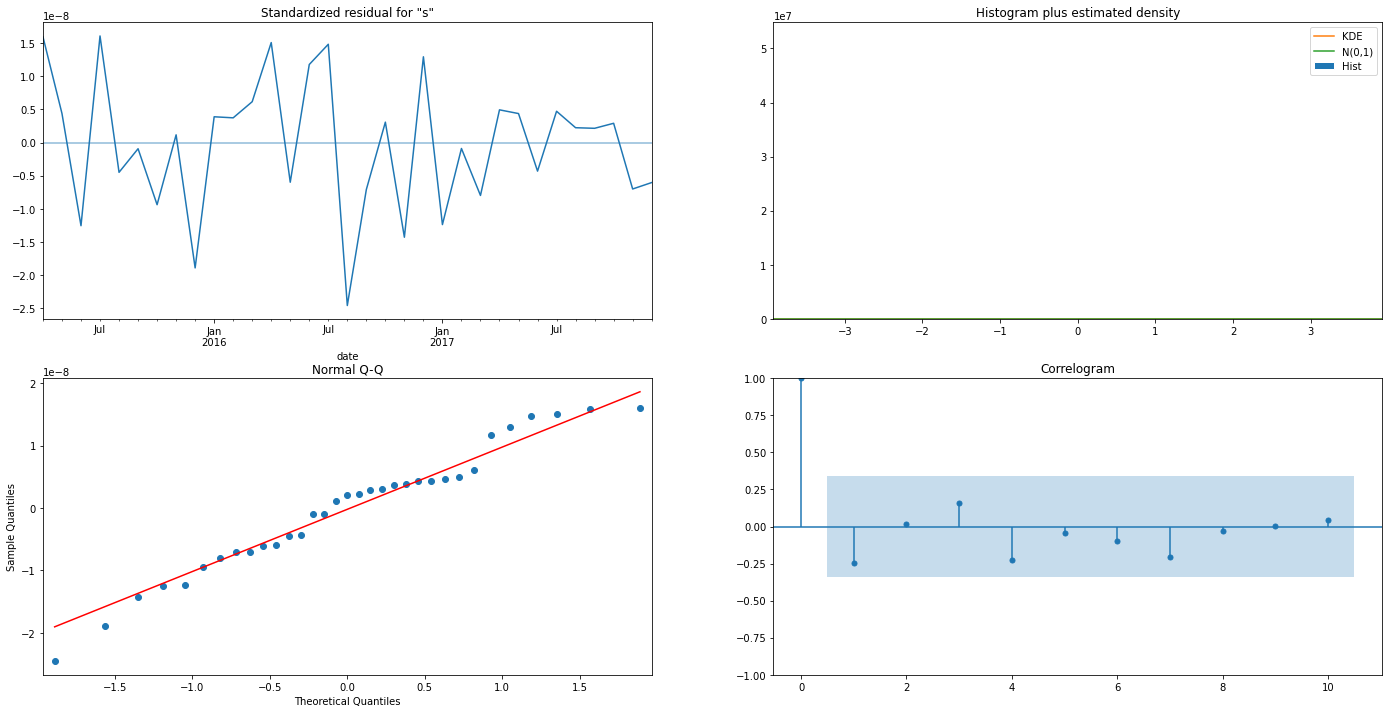

In [30]:
results.plot_diagnostics(figsize=(24,12))
plt.show()

VALIDATION OF FORECAST

In [32]:
prediction = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
prediction_ci = prediction.conf_int()
print(prediction_ci)
minimum = prediction_ci['lower sales']
print(minimum) 
maximum = prediction_ci['upper sales']
print(maximum)

             lower sales   upper sales
2018-01-01 -1.230908e+08  1.230909e+08
2018-01-01   -1.230908e+08
Freq: MS, Name: lower sales, dtype: float64
2018-01-01    1.230909e+08
Freq: MS, Name: upper sales, dtype: float64


<AxesSubplot:xlabel='date'>

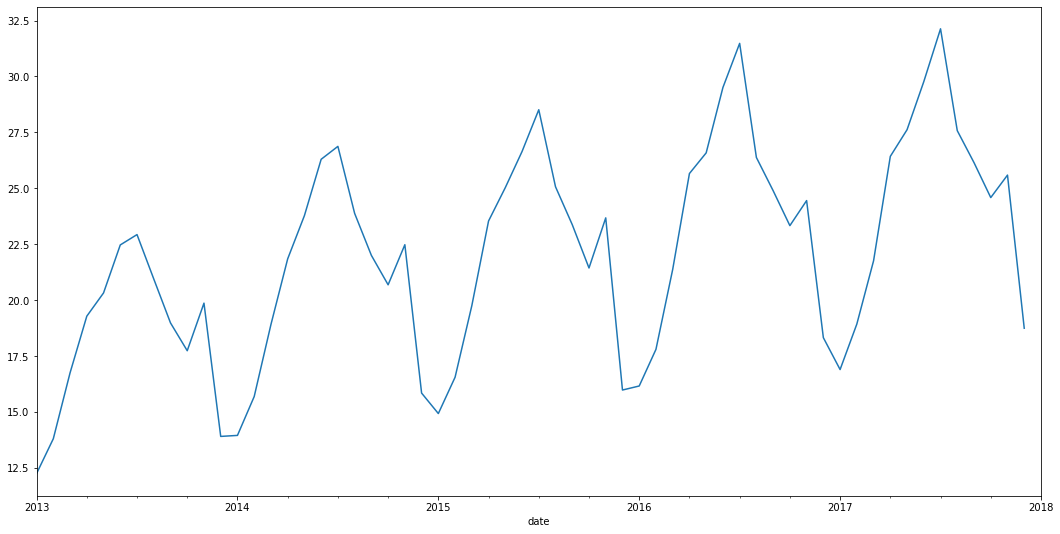

In [33]:
ax = y['2013':].plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='forcasting of item sales', alpha=0.9, figsize=(18,9))


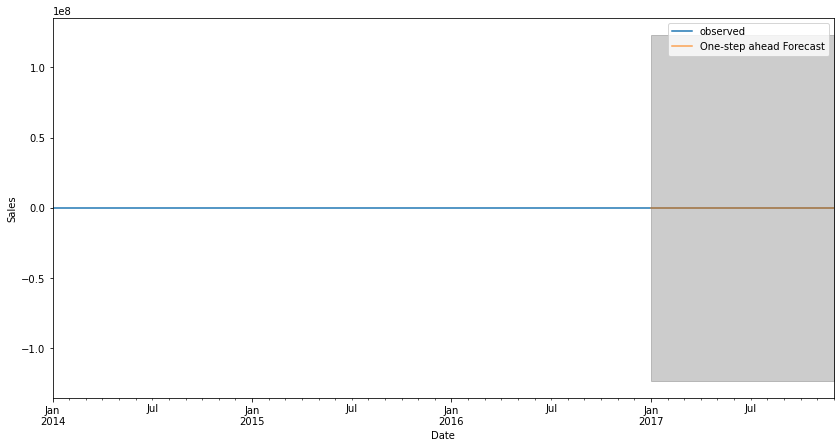

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.13


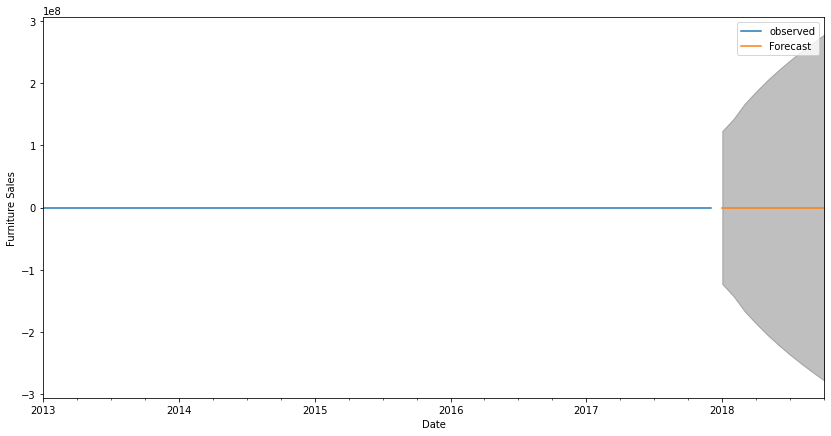

In [40]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

We can observe that the mean square error is 0.13 and the forcast but we cannot see an exact forecast we will move to more advance forcasting technique which is fbprophet.